
# Analisis Data Obesitas

**Nama:** Nurul Baroroh  
**NIM:** A11.2022.14802  
**Kelas:** DS 02

Eksplorasi dan analisis data obesitas berdasarkan berbagai faktor. Analisis mencakup:
- Pembersihan data
- Visualisasi distribusi
- Deteksi outlier
- Encoding fitur kategorikal
- Modeling klasifikasi obesitas

---


Nama : Nurul Baroroh
NIM : A11.2022.14802
DS 02

##Import Library

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

##Mount Drive

In [85]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Data/ObesityDataSet.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA

In [86]:
# Tampilkan 5 data pertama
print(df.head())

# Info umum
print("\nInformasi dataset:")
print(df.info())

# Deskripsi statistik
print("\nDeskripsi statistik:")
print(df.describe(include='all'))

df.dtypes

  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

,0
Age,object
Gender,object
Height,object
Weight,object
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


In [87]:
df.shape

(2111, 17)

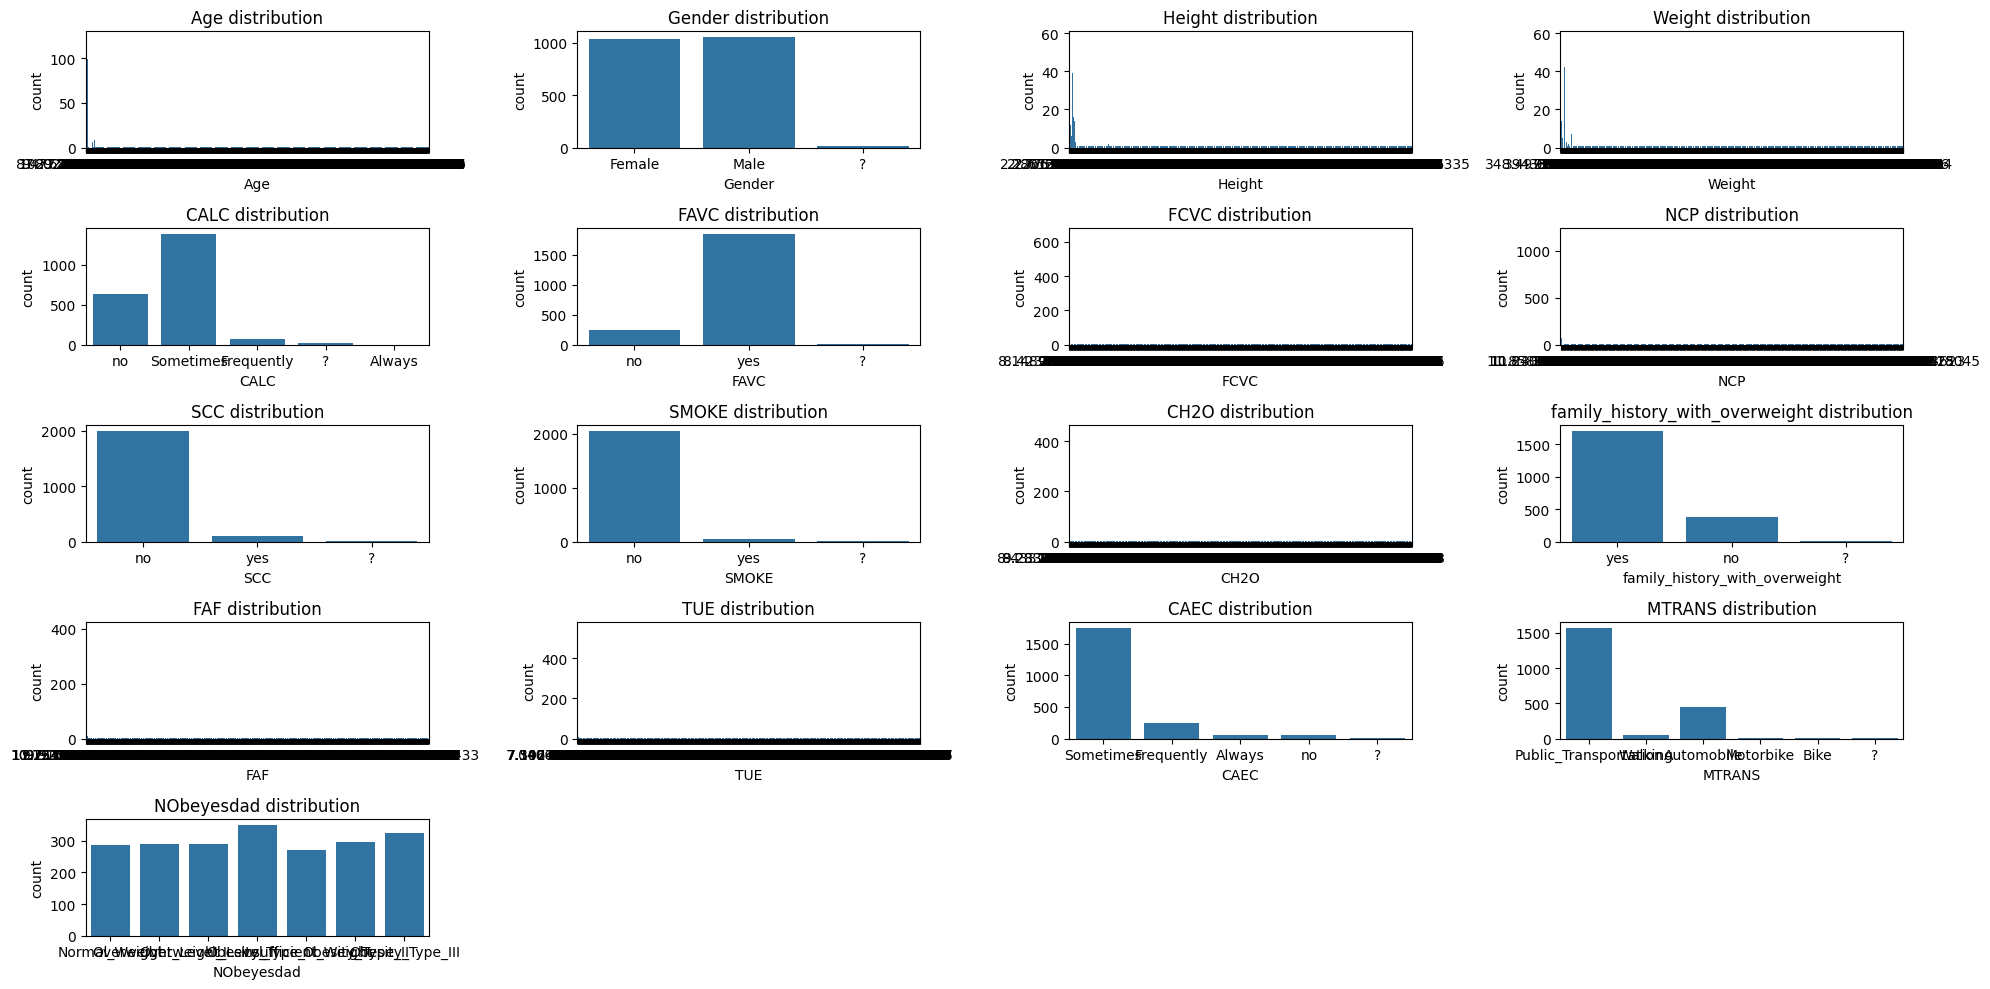

In [88]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 4, i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} distribution')
    plt.tight_layout()

plt.show()

## Memvalidasi Data

## cek missing values

In [89]:
print("\nMissing values per kolom:")
print(df.isnull().sum())


Missing values per kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


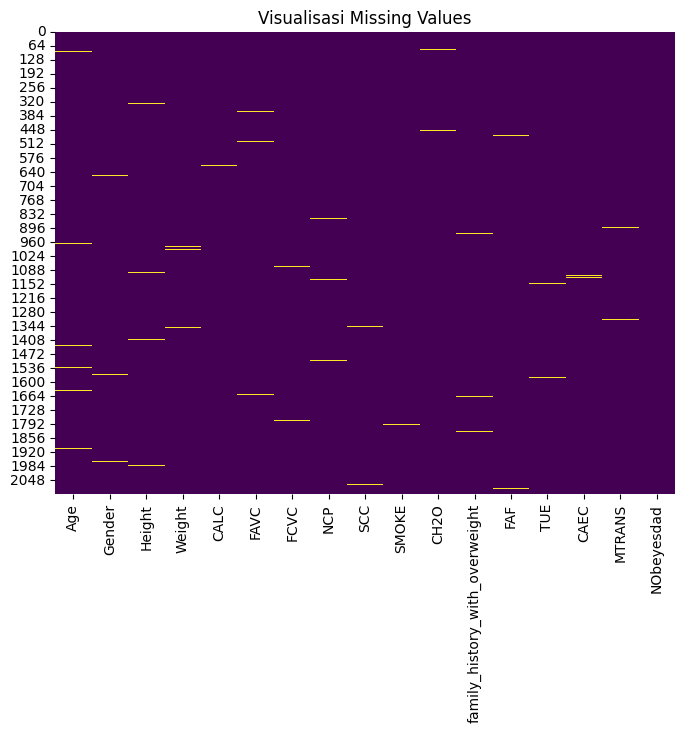

In [90]:
# Visualisasi Missing Values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values')
plt.show()

## Cek Duplikat

In [91]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2106,False
2107,False
2108,False
2109,False


In [92]:
df.duplicated().sum()
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
460,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
663,21,Female,1.52,42,Sometimes,yes,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
763,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
764,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
824,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I


## Cek Nilai Unik

In [93]:
for col in df.columns:
 print(f'{col}')
 print(f'Jumlah nilai yang unik: {df[col].nunique()}')
 print(f'Nilai yang paling sering muncul (modus): {df[col].mode().values[0]}')
 print(f'{df[col].unique()}\n')

Age
Jumlah nilai yang unik: 1394
Nilai yang paling sering muncul (modus): 18
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Gender
Jumlah nilai yang unik: 3
Nilai yang paling sering muncul (modus): Male
['Female' 'Male' '?' nan]

Height
Jumlah nilai yang unik: 1562
Nilai yang paling sering muncul (modus): 1.7
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Weight
Jumlah nilai yang unik: 1518
Nilai yang paling sering muncul (modus): 80
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

CALC
Jumlah nilai yang unik: 5
Nilai yang paling sering muncul (modus): Sometimes
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

FAVC
Jumlah nilai yang unik: 3
Nilai yang paling sering muncul (modus): yes
['no' 'yes' '?' nan]

FCVC
Jumlah nilai yang unik: 808
Nilai yang paling sering muncul (modus): 3
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2

##Membersihkan Data

In [94]:
# Ubah semua tanda tanya menjadi NaN
df.replace('?', np.nan, inplace=True)

##Handling Missing Values

In [95]:
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [96]:
# Konversi kolom numerik dari object ke float
cols_to_convert = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[cols_to_convert] = df[cols_to_convert].astype(float)

In [97]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [98]:
# Konversi kolom numerik dari object ke float
cols_to_convert = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[cols_to_convert] = df[cols_to_convert].astype(float)

# Define numeric and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Imputasi kolom numerik dengan median
for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Imputasi kolom kategorikal dengan nilai yang paling sering (modus)
for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [99]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


##Handling Duplikat

In [100]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2106,False
2107,False
2108,False
2109,False


In [101]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad


##Encoding

In [102]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi dictionary untuk menyimpan encoder
label_encoders = {}

# Loop melalui semua kolom kategorikal
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # pastikan bentuk string
    label_encoders[col] = le  # Simpan encoder untuk inverse transform jika perlu

# Encode target secara terpisah
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'].astype(str))

In [103]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


In [104]:
print("Target classes (NObeyesdad):", target_encoder.classes_)

Target classes (NObeyesdad): ['0' '1' '2' '3' '4' '5' '6']


##Mengkontruksi Data

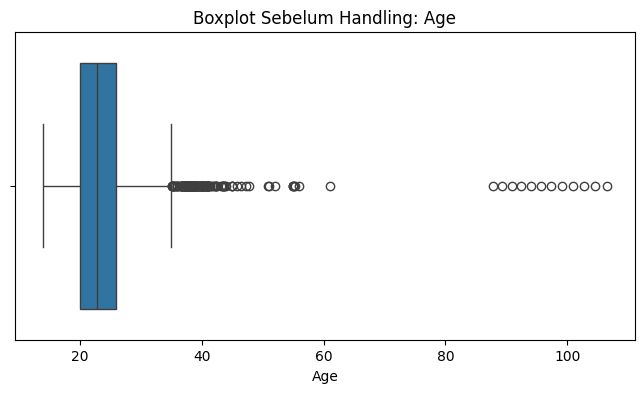

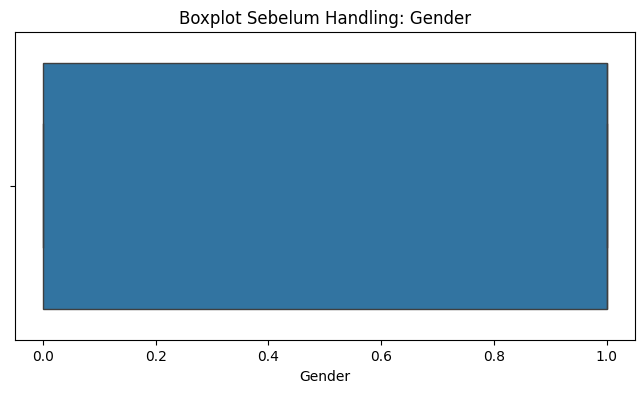

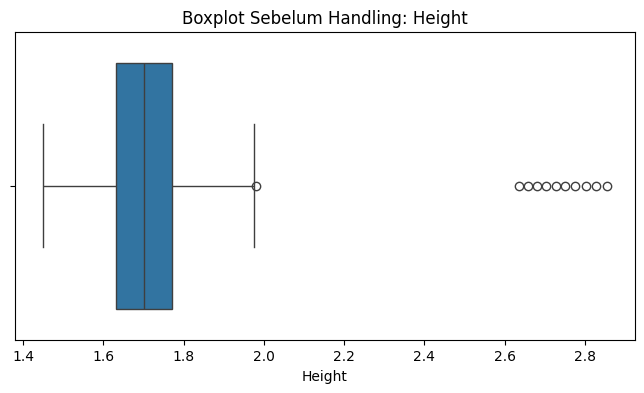

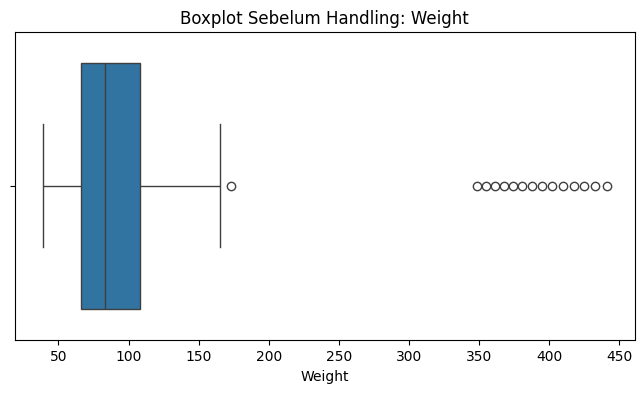

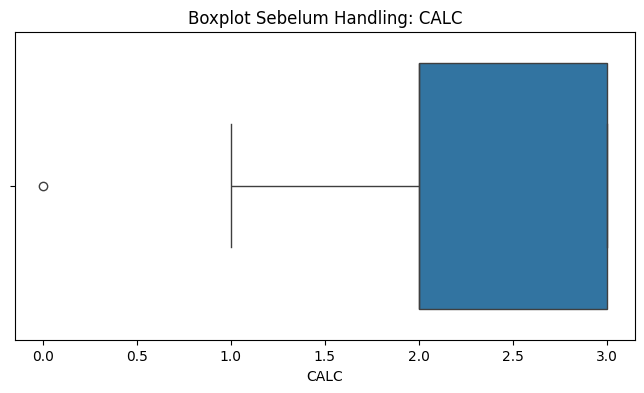

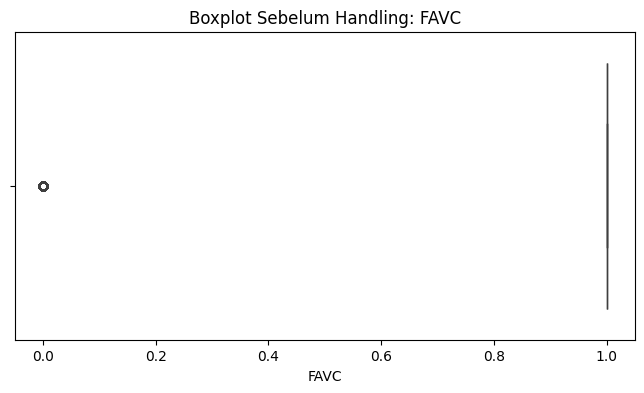

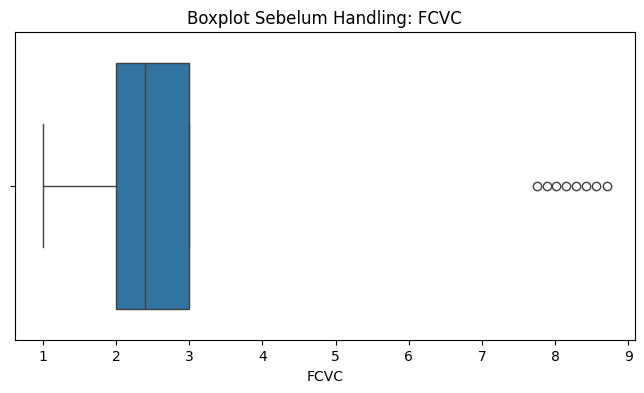

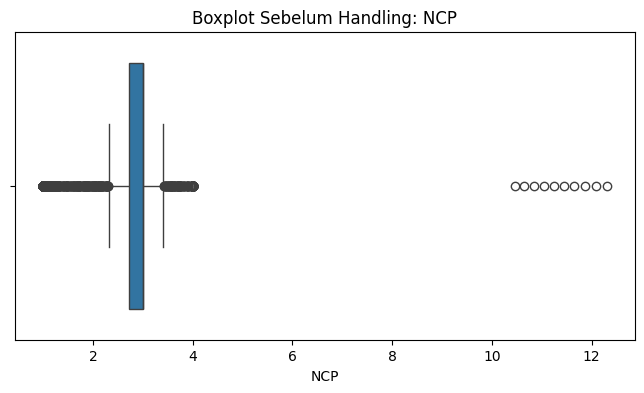

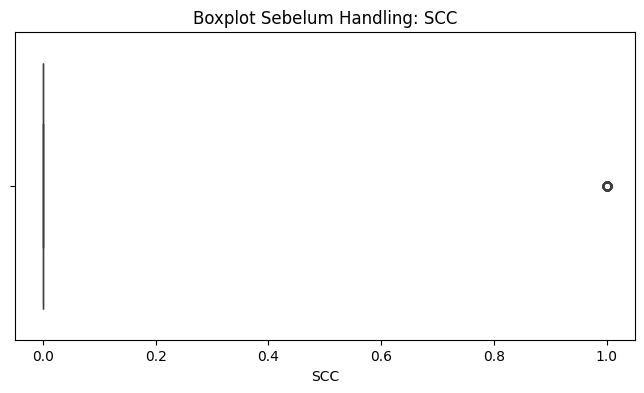

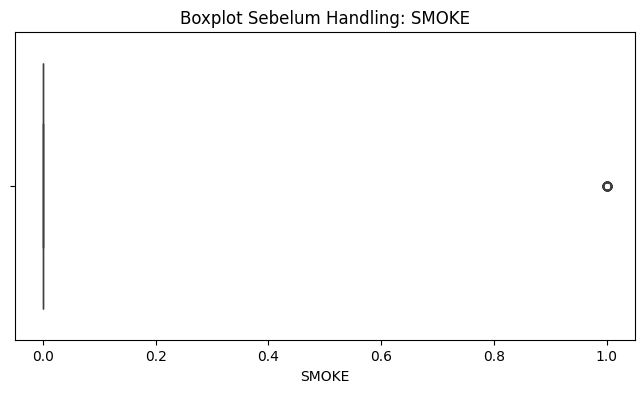

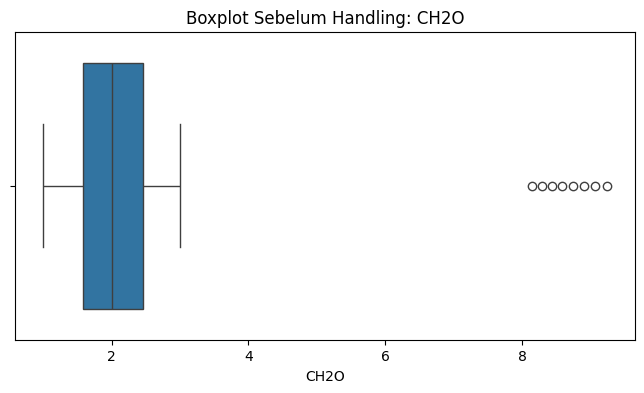

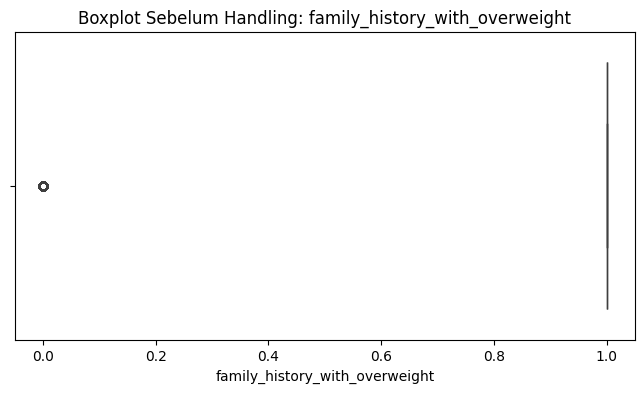

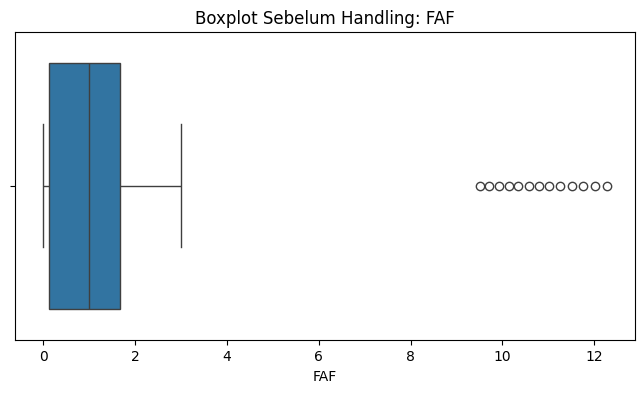

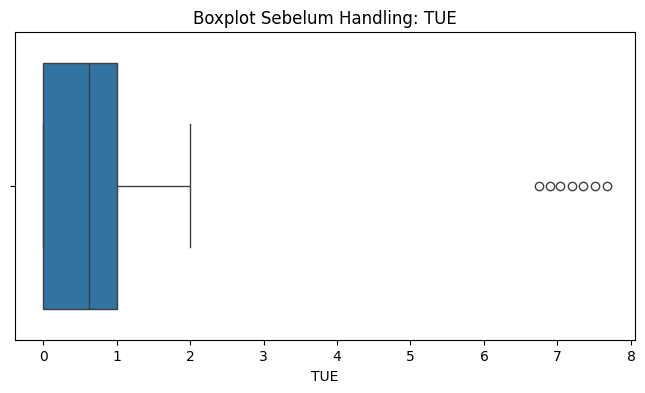

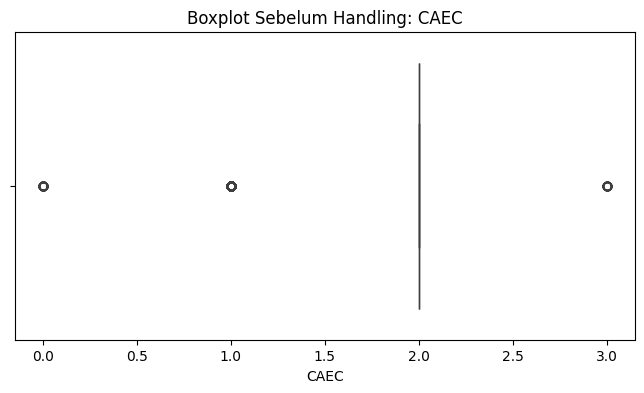

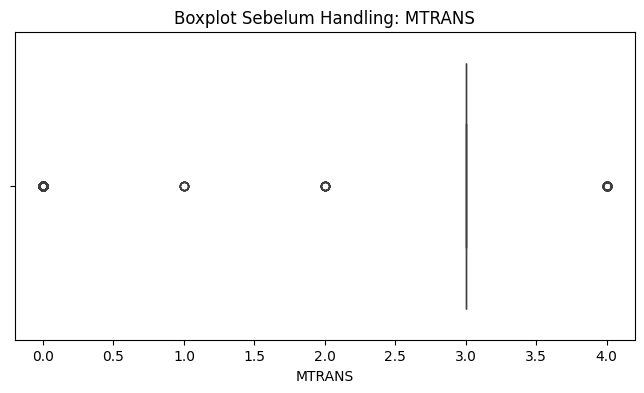

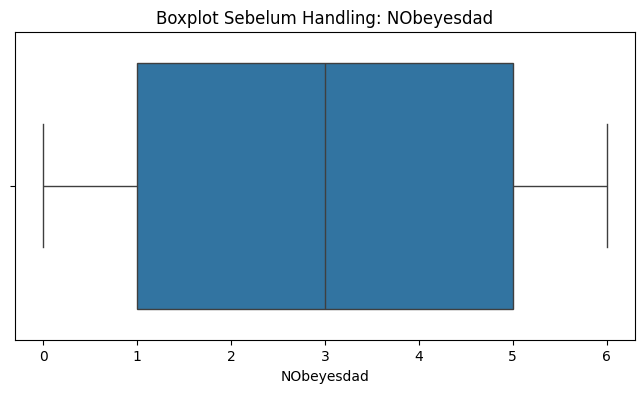

In [105]:
# Deteksi Outlier dan Visualisasi Sebelum Handling
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot Sebelum Handling: {col}')
    plt.show()

##Handling Outlier

In [106]:
# Remove rows where Age is greater than 80
df = df[df['Age'] <= 80]

# Remove rows where Height is greater than 2.2
df = df[df['Height'] <= 2.2]

# Remove rows where Weight is greater than 250
df = df[df['Weight'] <= 250]

In [107]:
# Handle outliers for other numeric columns using IQR
numeric_cols_with_outliers = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numeric_cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

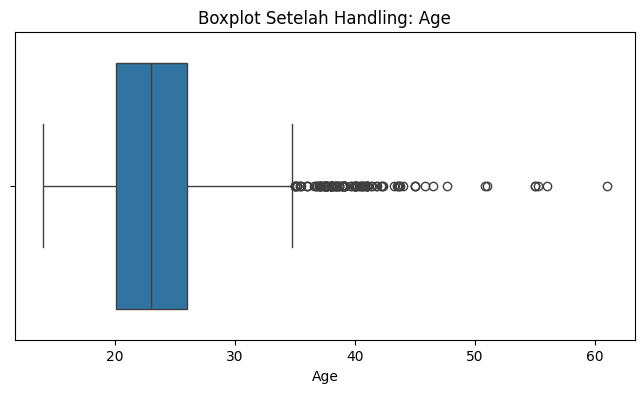

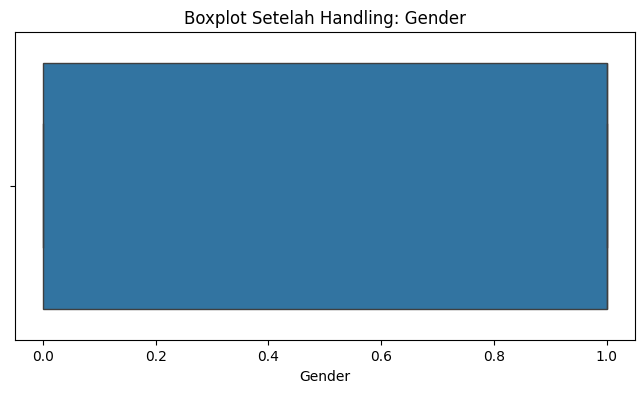

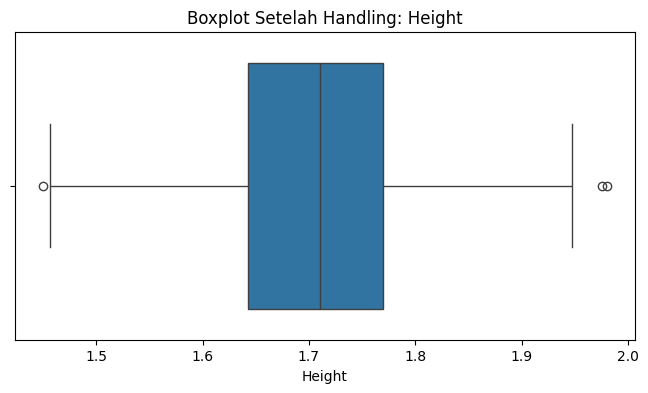

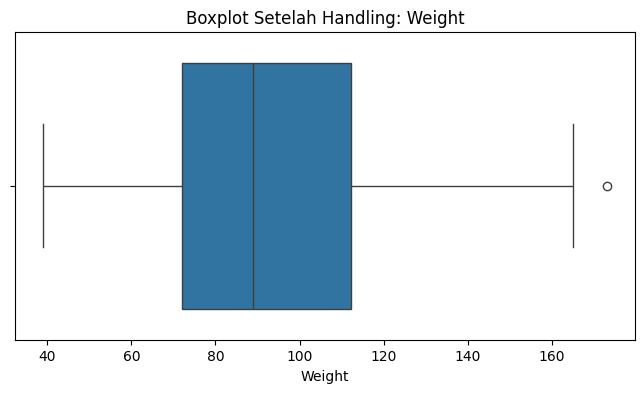

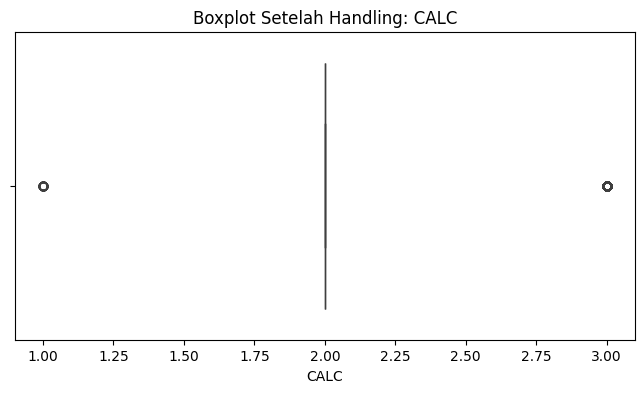

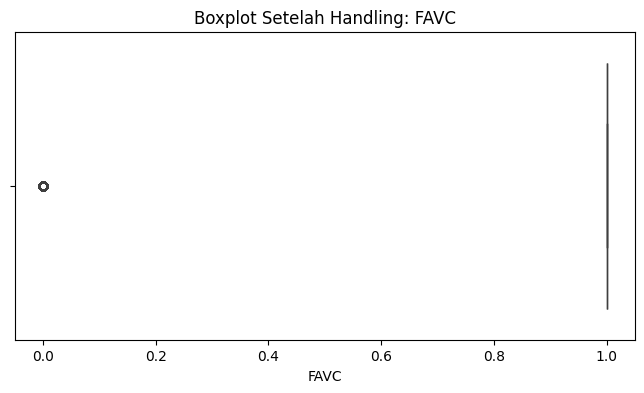

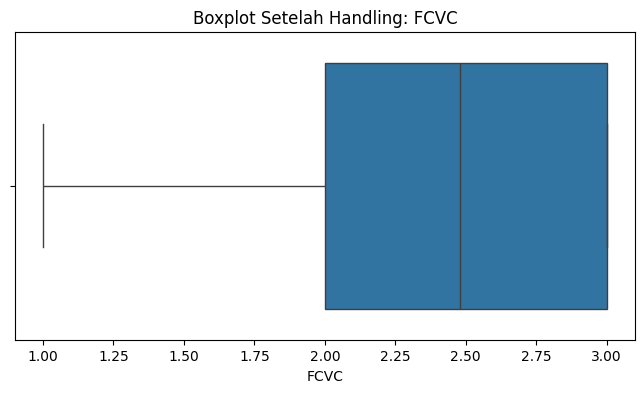

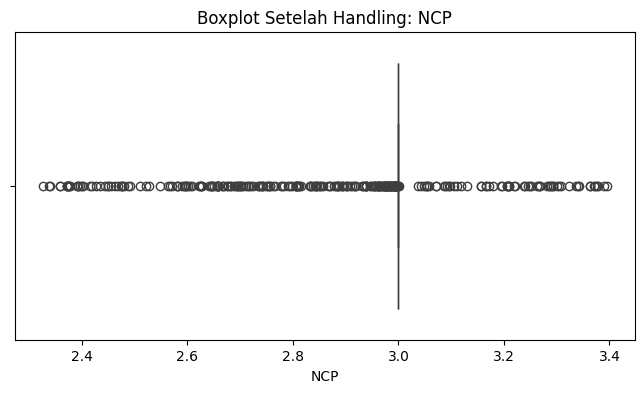

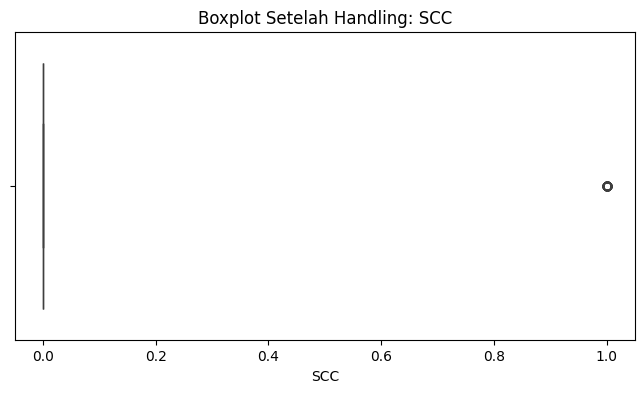

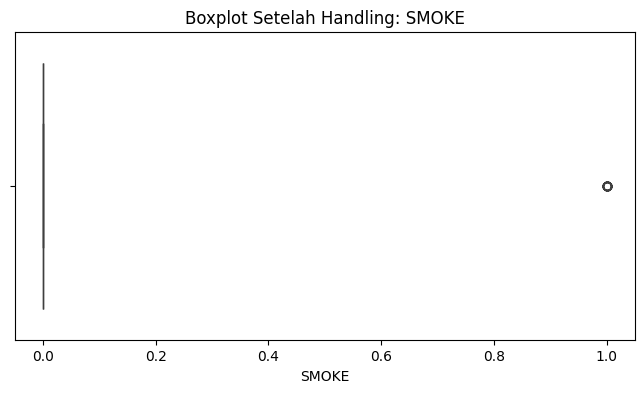

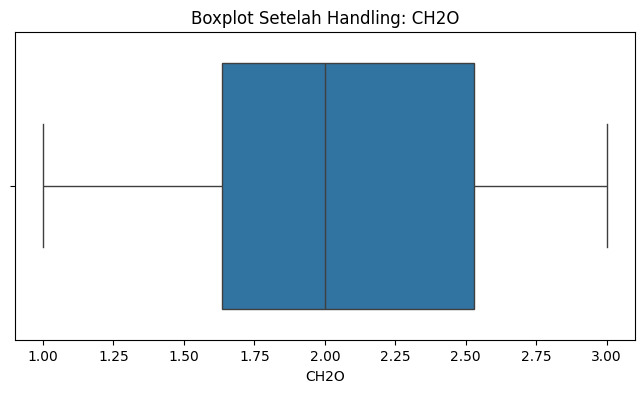

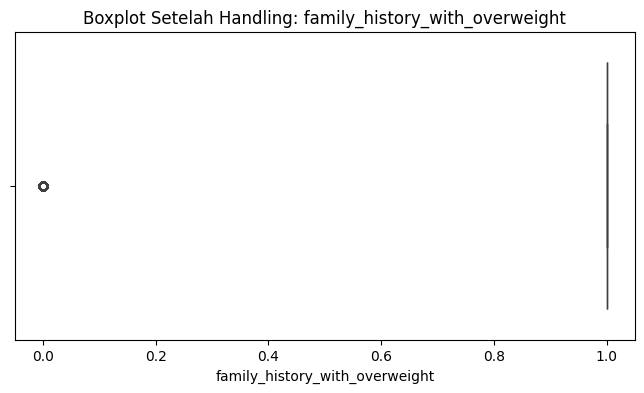

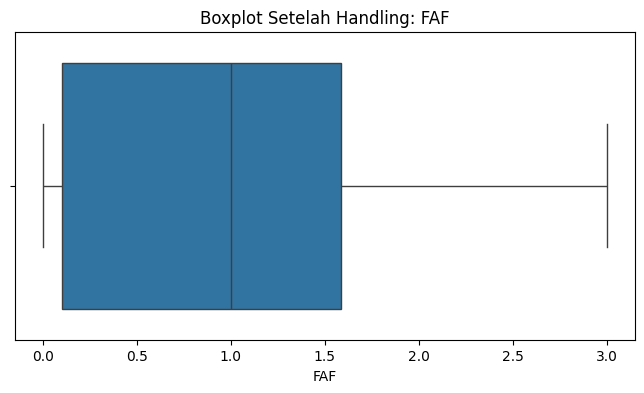

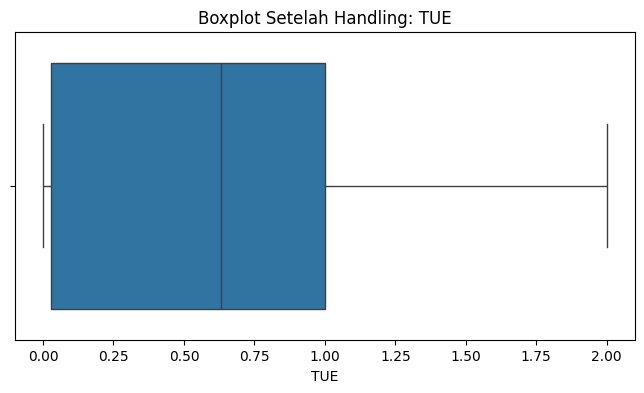

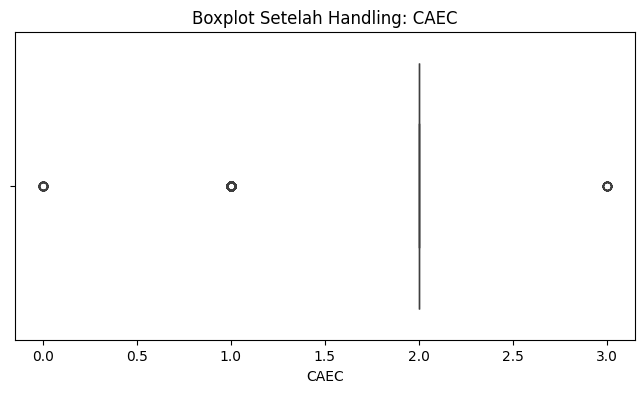

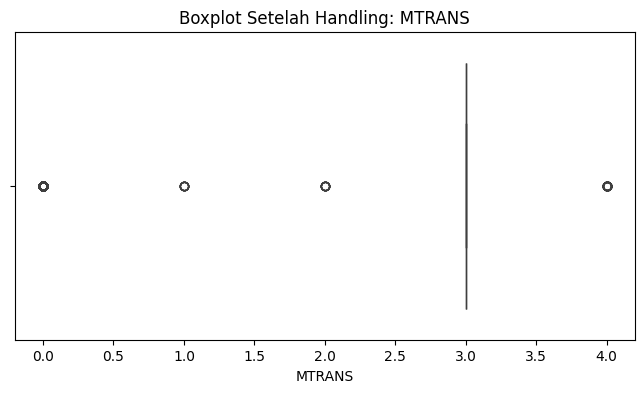

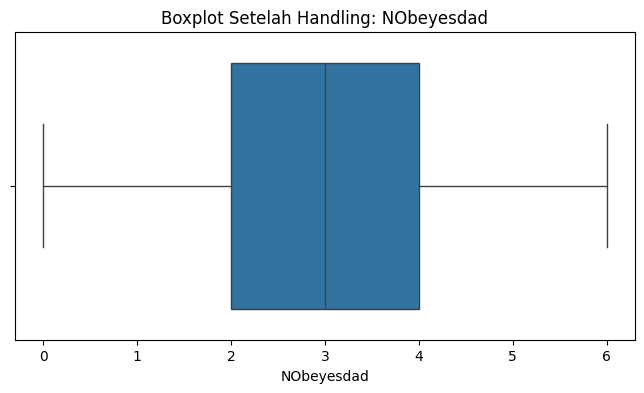

In [108]:
# Deteksi Outlier dan Visualisasi Setelah Handling
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot Setelah Handling: {col}')
    plt.show()

##Imbalance

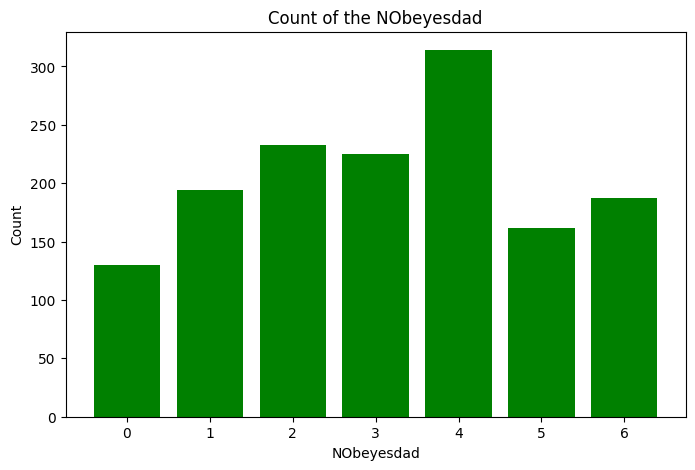

In [109]:
class_counts = df['NObeyesdad'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(class_counts.index.astype(str), class_counts.values, color='green')
plt.title('Count of the NObeyesdad')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[str(i) for i in range(7)])  # memastikan label 0-6 muncul
plt.show()

In [110]:
from imblearn.over_sampling import SMOTE

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Select the most influential features from the resampled data
influential_features = ['Weight', 'family_history_with_overweight', 'FAF', 'MTRANS', 'FCVC']
X_resampled_selected = X_resampled[influential_features]

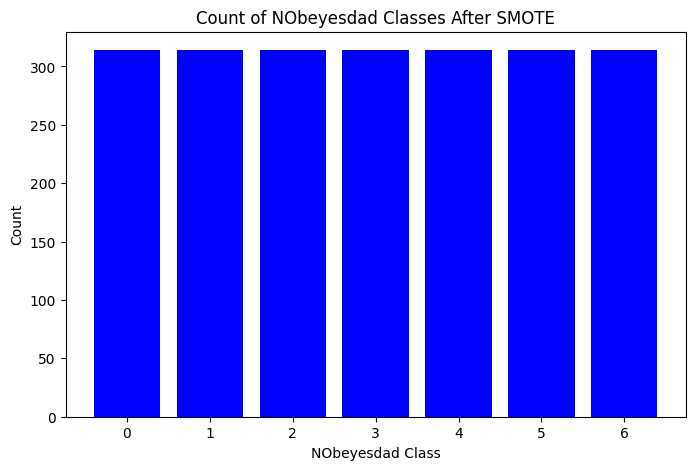

In [111]:
# Visualisasi distribusi kelas setelah SMOTE
class_counts_resampled = y_resampled.value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(class_counts_resampled.index.astype(str), class_counts_resampled.values, color='blue')
plt.title('Count of NObeyesdad Classes After SMOTE')
plt.xlabel('NObeyesdad Class')
plt.ylabel('Count')
plt.xticks(ticks=range(len(class_counts_resampled.index)), labels=class_counts_resampled.index.astype(str))
plt.show()

In [112]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for normalization
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variable if it's in numeric_cols
if 'NObeyesdad' in numeric_cols:
    numeric_cols.remove('NObeyesdad')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

display(df.head())

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.148936,0.0,0.320755,0.186567,1.0,0.0,0.5,0.63054,0.0,0.0,0.5,1.0,0.000000,0.5,0.666667,0.75,1
1,0.148936,0.0,0.132075,0.126866,0.5,0.0,1.0,0.63054,1.0,1.0,1.0,1.0,1.000000,0.0,0.666667,0.75,1
2,0.191489,1.0,0.660377,0.283582,0.0,0.0,0.5,0.63054,0.0,0.0,0.5,1.0,0.666667,0.5,0.666667,0.75,1
3,0.276596,1.0,0.660377,0.358209,0.0,0.0,1.0,0.63054,0.0,0.0,0.5,0.0,0.666667,0.0,0.666667,1.00,5
5,0.319149,1.0,0.320755,0.104478,0.5,1.0,0.5,0.63054,0.0,0.0,0.5,0.0,0.000000,0.0,0.666667,0.00,1


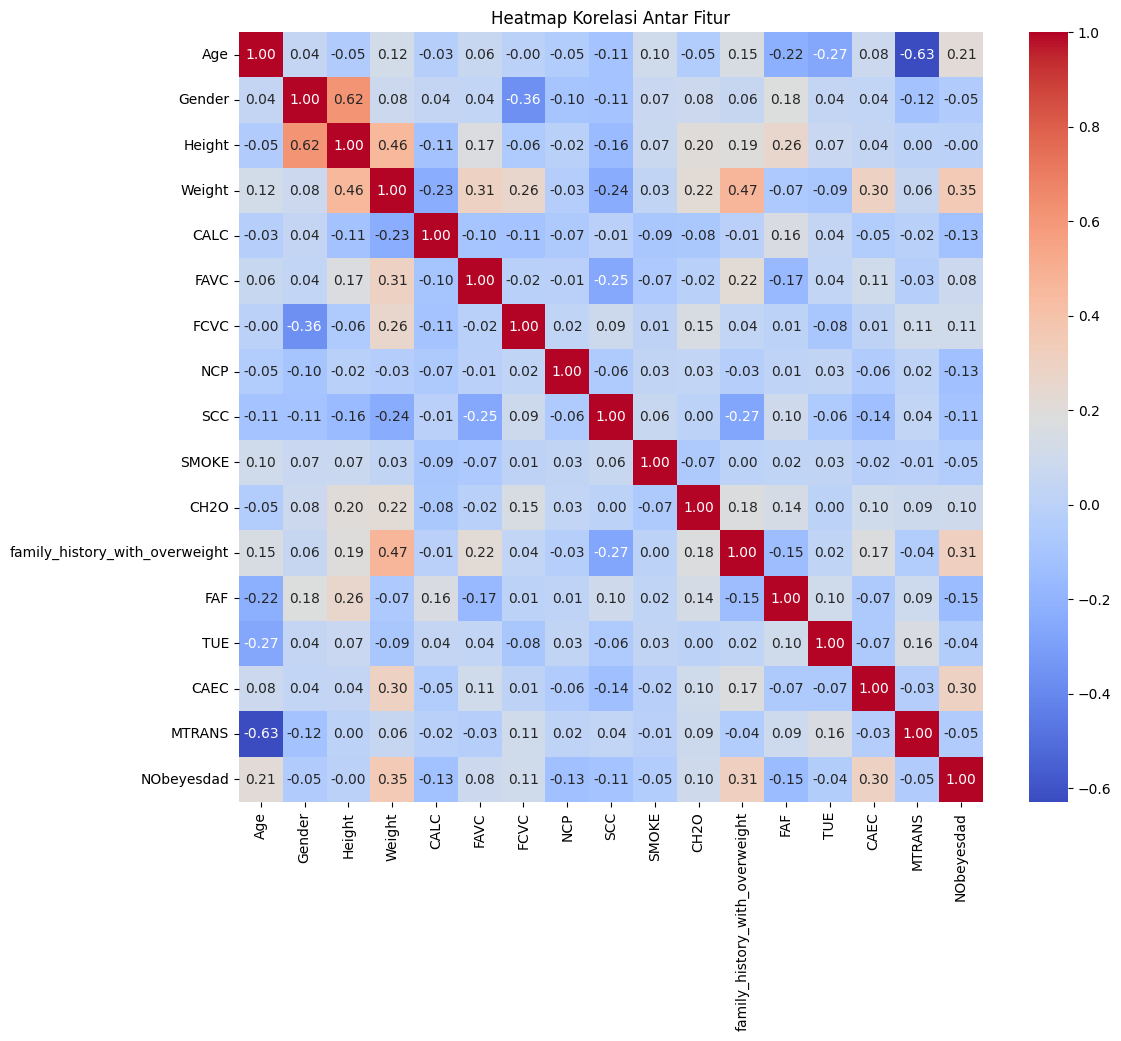

In [113]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

Korelasi antarfitur

Fitur paling berpengaruh terhadap obesitas:
Weight, family_history_with_overweight, FAF, MTRANS, FCVC.

Beberapa fitur bisa dipertimbangkan untuk dieliminasi:
SMOKE, CH2O, Gender, jika tidak terlalu relevan saat modeling.

In [114]:
# Select the most influential features and the target variable
influential_features = ['Weight', 'family_history_with_overweight', 'FAF', 'MTRANS', 'FCVC', 'NObeyesdad']
df_selected = df[influential_features].copy()

display(df_selected.head())

,Weight,family_history_with_overweight,FAF,MTRANS,FCVC,NObeyesdad
0,0.186567,1.0,0.000000,0.75,0.5,1
1,0.126866,1.0,1.000000,0.75,1.0,1
2,0.283582,1.0,0.666667,0.75,0.5,1
3,0.358209,0.0,0.666667,1.00,1.0,5
5,0.104478,0.0,0.000000,0.00,0.5,1


##Split Data

In [115]:
from sklearn.model_selection import train_test_split

# Use the resampled and selected data for splitting
X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1758, 5)
X_test shape: (440, 5)
y_train shape: (1758,)
y_test shape: (440,)


## Modeling Klasifikasi

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Train the models using resampled and selected data
log_reg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

print("Models trained successfully using resampled and selected data.")

Models trained successfully using resampled and selected data.


## Evaluasi Model

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,Logistic Regression,0.713636,0.716313,0.714103,0.710014
1,Decision Tree,0.843182,0.846029,0.843391,0.844080
2,Random Forest,0.879545,0.884036,0.879563,0.880547
3,K-Nearest Neighbors,0.831818,0.832684,0.832053,0.830300


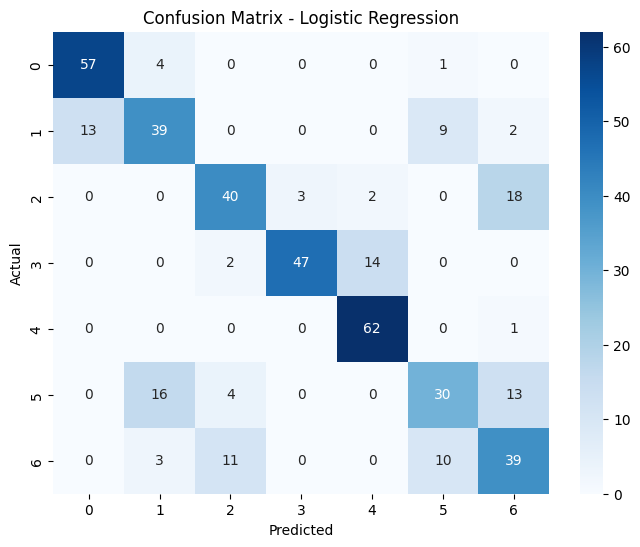

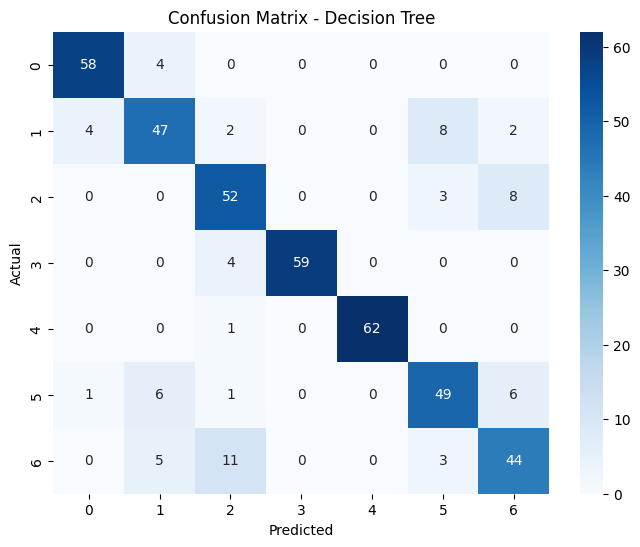

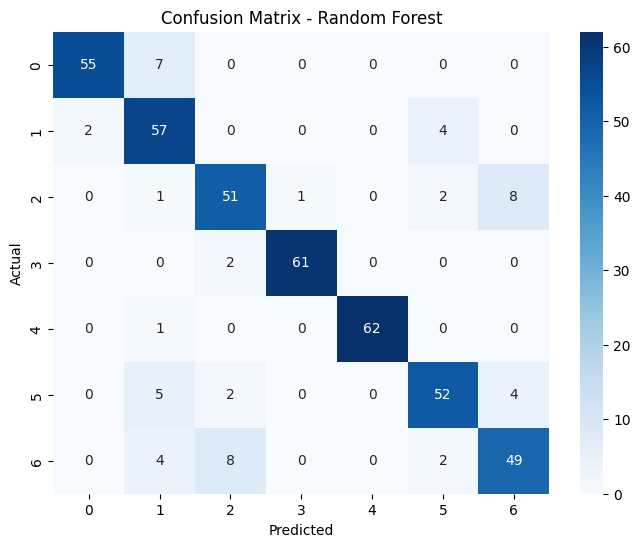

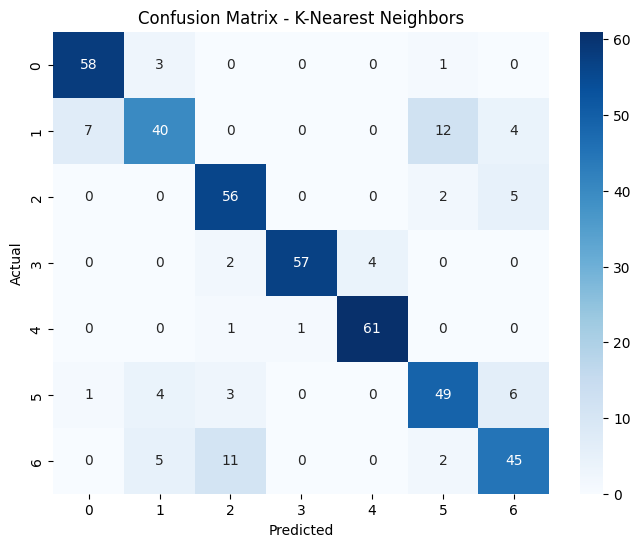

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Make predictions using resampled and selected test data
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Evaluate models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
predictions = [y_pred_log_reg, y_pred_dt, y_pred_rf, y_pred_knn]

evaluation_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)'])

for model_name, y_pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    evaluation_results = pd.concat([evaluation_results, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (Macro)': precision,
        'Recall (Macro)': recall,
        'F1-score (Macro)': f1
    }])], ignore_index=True)

display(evaluation_results)

# Display confusion matrix for each model
for model_name, y_pred in zip(models, predictions):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Hyperparameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grids for each model
param_grid_log_reg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform GridSearchCV for each model using resampled and selected data
# Add class_weight='balanced' to models that support it
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'), param_grid_log_reg, cv=5)
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), param_grid_dt, cv=5)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, cv=5)
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5) # KNN does not support class_weight

# Fit the GridSearchCV objects to the training data using resampled and selected data
grid_search_log_reg.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)

# Get the best models
best_log_reg_model = grid_search_log_reg.best_estimator_
best_dt_model = grid_search_dt.best_estimator_
best_rf_model = grid_search_rf.best_estimator_
best_knn_model = grid_search_knn.best_estimator_

print("Hyperparameter tuning complete using resampled and selected data with balanced class weights.")

Hyperparameter tuning complete using resampled and selected data with balanced class weights.


## Evaluasi Model Setelah Hyperparameter Tuning

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,Logistic Regression (Tuned),0.718182,0.719484,0.718601,0.715531
1,Decision Tree (Tuned),0.829545,0.833245,0.829566,0.830720
2,Random Forest (Tuned),0.881818,0.885679,0.881830,0.882575
3,K-Nearest Neighbors (Tuned),0.838636,0.840014,0.838893,0.837848


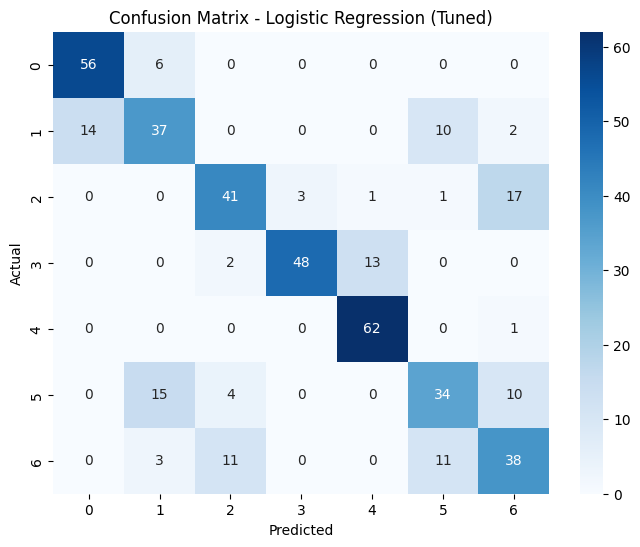

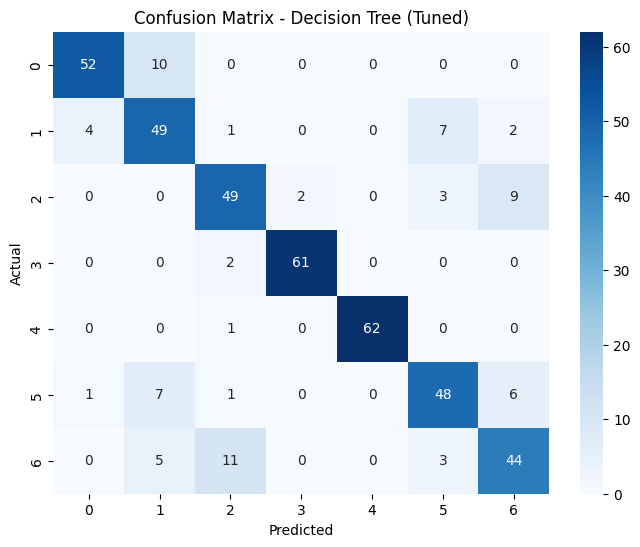

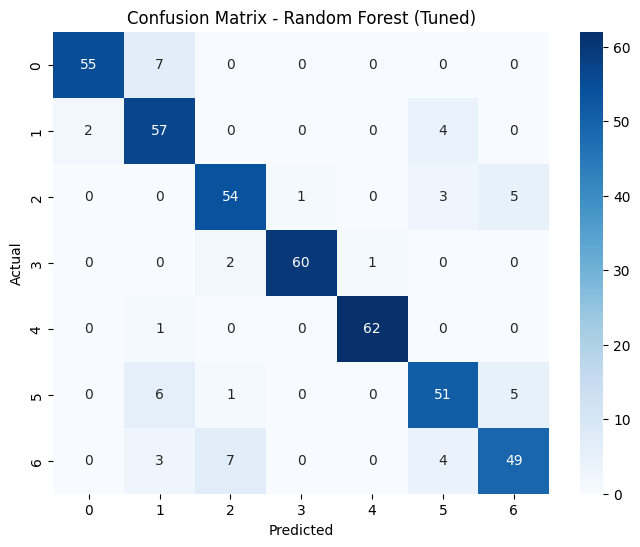

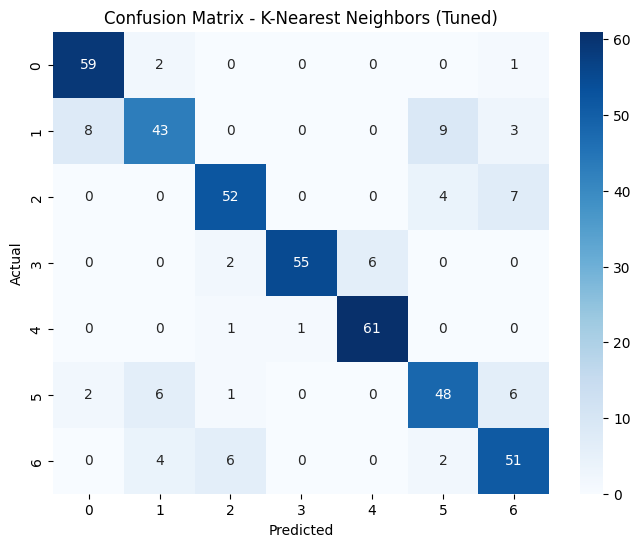

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions with the best models using resampled and selected test data
y_pred_log_reg_tuned = best_log_reg_model.predict(X_test)
y_pred_dt_tuned = best_dt_model.predict(X_test)
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_pred_knn_tuned = best_knn_model.predict(X_test)

# Evaluate tuned models
tuned_models = ['Logistic Regression (Tuned)', 'Decision Tree (Tuned)', 'Random Forest (Tuned)', 'K-Nearest Neighbors (Tuned)']
tuned_predictions = [y_pred_log_reg_tuned, y_pred_dt_tuned, y_pred_rf_tuned, y_pred_knn_tuned]

tuned_evaluation_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)'])

for model_name, y_pred in zip(tuned_models, tuned_predictions):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    tuned_evaluation_results = pd.concat([tuned_evaluation_results, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (Macro)': precision,
        'Recall (Macro)': recall,
        'F1-score (Macro)': f1
    }])], ignore_index=True)

display(tuned_evaluation_results)

# Display confusion matrix for each tuned model
for model_name, y_pred in zip(tuned_models, tuned_predictions):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [120]:
# Create a DataFrame with multiple sample inputs (6 samples) designed to show varied predictions
# These are example values; replace with actual values for specific predictions if needed.
# The values are chosen to potentially represent different obesity categories.
sample_data_multiple = {
    'Age': [20, 35, 50, 28, 45, 22],
    'Gender': [0, 1, 0, 1, 0, 0], # 0 for Female, 1 for Male (example encoding)
    'Height': [1.60, 1.75, 1.55, 1.80, 1.68, 1.63],
    'Weight': [45, 70, 95, 120, 60, 52], # Varied weights
    'CALC': [3, 1, 2, 0, 3, 2], # Example encoded values
    'FAVC': [0, 1, 0, 1, 0, 1], # Example encoded values
    'FCVC': [2.5, 1.0, 3.0, 1.5, 2.0, 2.0],
    'NCP': [3.0, 2.0, 4.0, 1.0, 3.0, 3.0],
    'SCC': [0, 0, 1, 0, 0, 0], # Example encoded values
    'SMOKE': [0, 0, 0, 1, 0, 0], # Example encoded values
    'CH2O': [2.0, 1.0, 3.0, 1.5, 2.5, 2.0],
    'family_history_with_overweight': [0, 1, 1, 1, 0, 0], # Example encoded values
    'FAF': [1.0, 0.0, 2.0, 0.5, 1.5, 1.0],
    'TUE': [0.5, 1.0, 0.0, 2.0, 1.0, 0.0],
    'CAEC': [2, 0, 3, 1, 2, 2], # Example encoded values
    'MTRANS': [3, 0, 1, 4, 2, 3] # Example encoded values
}

sample_df_original_multiple = pd.DataFrame(sample_data_multiple)

# Apply the scaler to the complete sample data
sample_df_normalized_multiple = pd.DataFrame(scaler.transform(sample_df_original_multiple), columns=sample_df_original_multiple.columns)

# Select only the influential features for prediction
influential_features = ['Weight', 'family_history_with_overweight', 'FAF', 'MTRANS', 'FCVC']
sample_df_selected_multiple = sample_df_normalized_multiple[influential_features]


# Use the best Random Forest model for prediction
prediction_model = best_rf_model # Assuming best_rf_model is already defined from hyperparameter tuning

# Make predictions for each sample
predictions_encoded = prediction_model.predict(sample_df_selected_multiple)

# Decode the predictions back to original class labels
predictions_original = target_encoder.inverse_transform(predictions_encoded)

# Display the sample data and predictions in a more UI friendly way
print("Manual Predictions for Sample Inputs:")
for i, prediction in enumerate(predictions_original):
    print(f"Sample {i+1}: Predicted NObeyesdad -> {prediction}")

# Optional: Display the sample data with predictions as a DataFrame as well
# sample_df_original_multiple['Predicted_NObeyesdad'] = predictions_original
# display(sample_df_original_multiple)

Manual Predictions for Sample Inputs:
Sample 1: Predicted NObeyesdad -> 1
Sample 2: Predicted NObeyesdad -> 1
Sample 3: Predicted NObeyesdad -> 1
Sample 4: Predicted NObeyesdad -> 1
Sample 5: Predicted NObeyesdad -> 1
Sample 6: Predicted NObeyesdad -> 1
